In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
measurement_ref = Base.classes.measurement
station_ref = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement_ref.date).order_by(measurement_ref.date.desc()).first().date
most_recent_date


'2017-08-23'

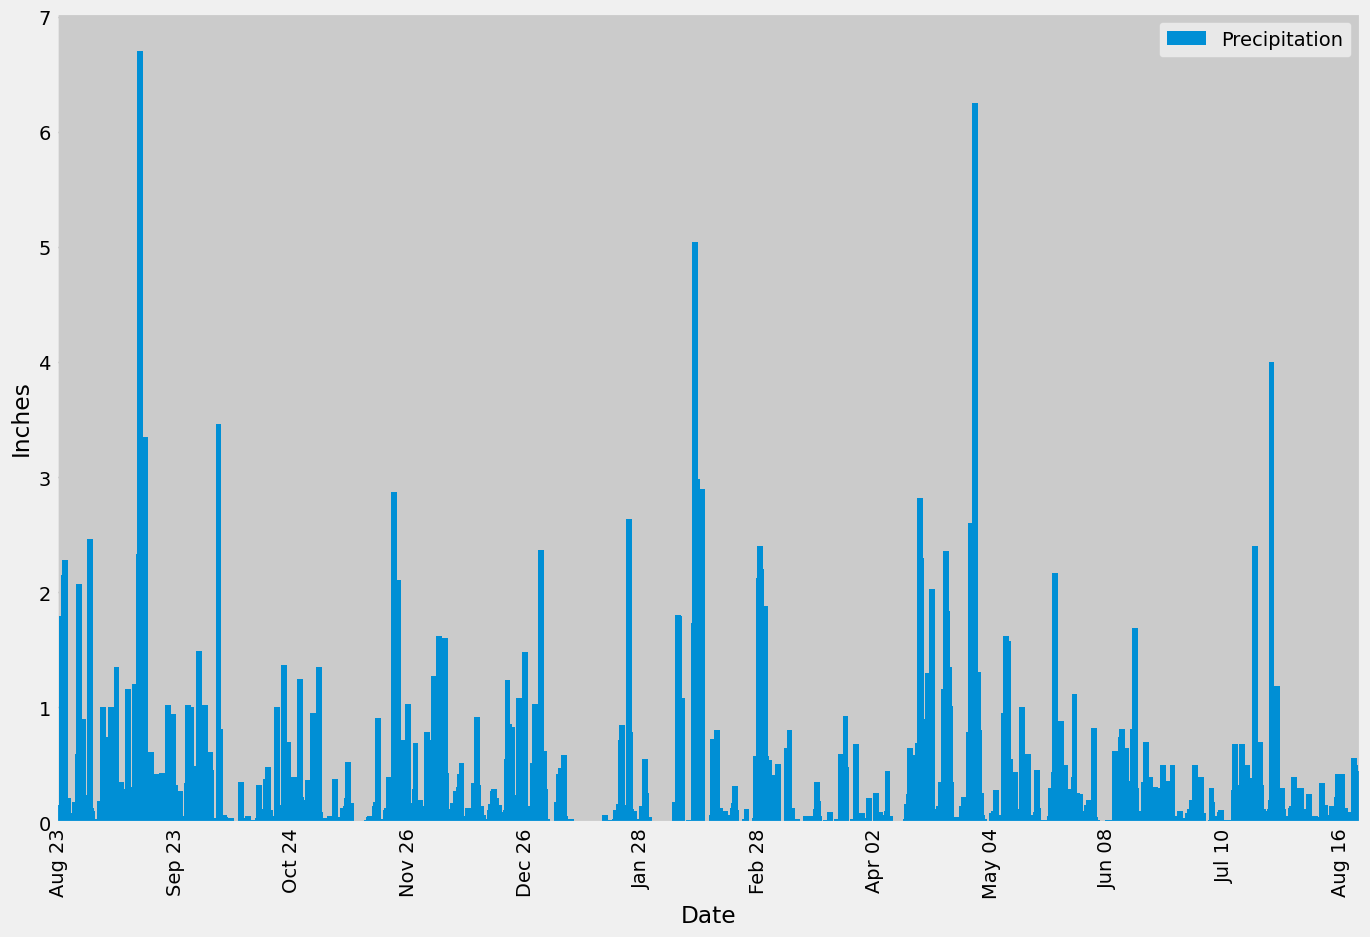

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
timestamp_arr = most_recent_date.split('-')
start_date = dt.date(int(timestamp_arr[0]), int(timestamp_arr[1]), int(timestamp_arr[2])) - dt.timedelta(days = 365)
start_date

# Perform a query to retrieve the data and precipitation scores
last_prcp = session.query(measurement_ref.date, measurement_ref.prcp).\
    filter(measurement_ref.date >= start_date).\
    order_by(measurement_ref.date).all()
last_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_prcp, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by="Date", ascending=True)
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data

df_plot = prcp_df.plot(kind='bar', width=10, figsize=(15,10))
n = 200
x_labels = [pd.to_datetime(date).strftime('%b %d') if i % n == 0 else ''
          for i, date in enumerate(prcp_df['Date'])]
df_plot.set_xticklabels(x_labels)
df_plot.set_xlabel('Date')
df_plot.set_ylabel('Inches')
plt.show()


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset

session.query(station_ref.station).count()

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_agg = session.query(measurement_ref.station, func.count(measurement_ref.station)).\
    group_by(measurement_ref.station).\
    order_by(func.count(measurement_ref.station).desc()).all()
station_agg

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_agg[0][0]
most_active_station
session.query(func.min(measurement_ref.tobs), func.max(measurement_ref.tobs), func.avg(measurement_ref.tobs)).\
                filter(measurement_ref.station == most_active_station).all()


[(54.0, 85.0, 71.66378066378067)]

In [36]:
output = session.query(func.min(measurement_ref.tobs), func.max(measurement_ref.tobs), func.avg(measurement_ref.tobs)).\
                filter(measurement_ref.date >= start_date).all()
output

[(58.0, 87.0, 74.59058295964125)]

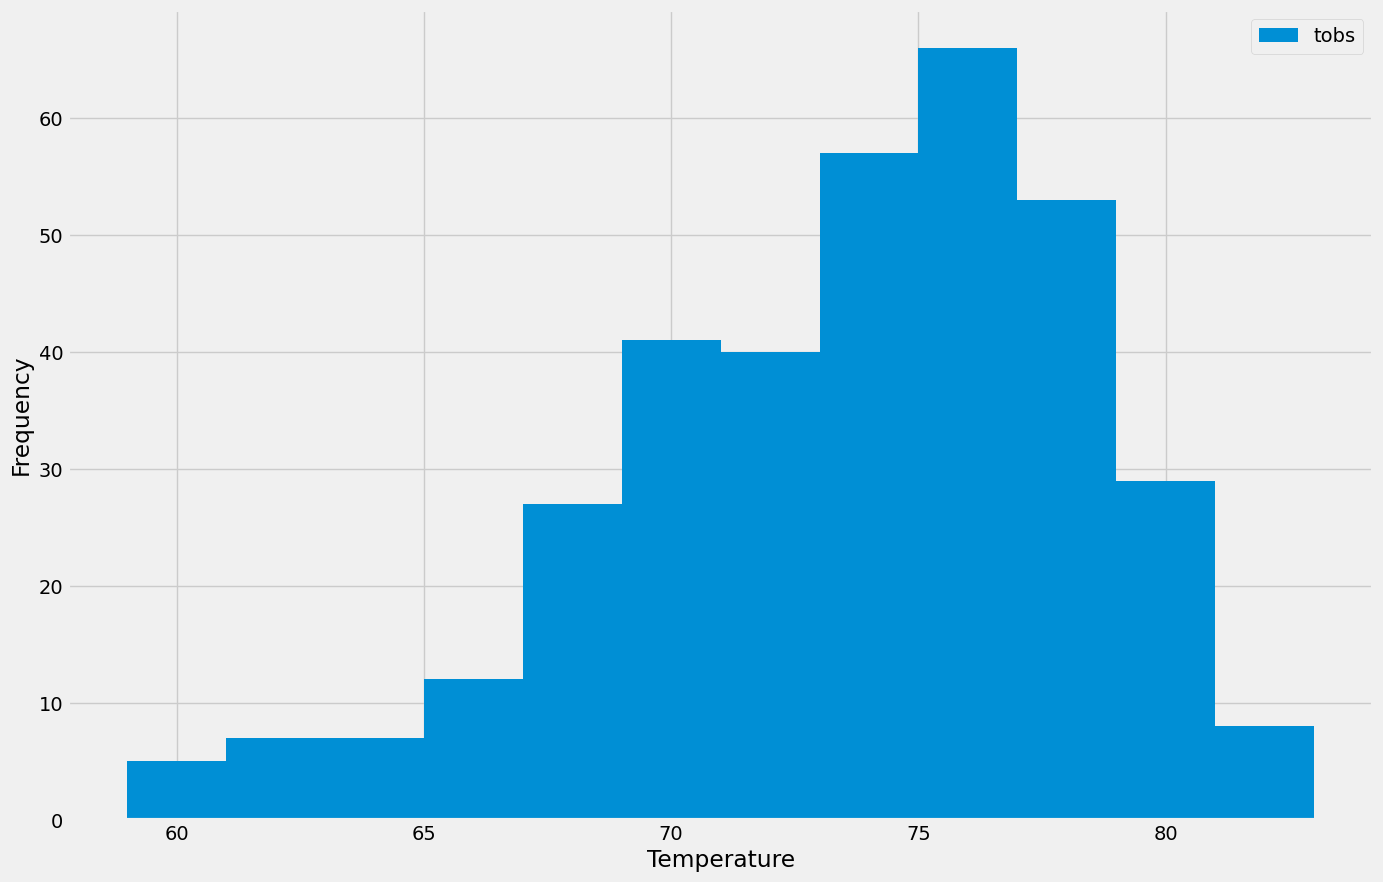

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observation = session.query(measurement_ref.station, measurement_ref.tobs).\
                filter(measurement_ref.station == most_active_station).\
                filter(measurement_ref.date >= start_date).all()
temp_observation


tobs = pd.DataFrame(temp_observation, columns=['Station', 'tobs'])
tobs


#plot histogram

tobs_histogram = tobs.plot.hist(bins=12, figsize=(15,10))
tobs_histogram.set_xlabel('Temperature')
plt.show()



# Close session

In [38]:
# Close Session
session.close()